This Notebook is for the purpose of data exploration of Buoy data.

In [95]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
# Months enums, haven't found python values 
January = 1
February = 2
March = 3
April = 4
May = 5
June = 6
July = 7
August = 8
September = 9

In [70]:
def read_month(id, month, year):
    path = '../BuoyData/{}/{}{}{}.txt'.format(id, id, month, year)
    df = pd.read_csv(path, 
                     delim_whitespace = True, 
                     skiprows = [1], 
                     parse_dates = {'DATETIME' : [0,1,2,3,4] })
    return df

def read_year(id, fromMonth, toMonth, year):
    return [ read_month(id, month, year) for month in range(fromMonth, toMonth + 1) ]

In [97]:
# data values
buyo_ids = [41002, 41040, 41041, 41043, 41044]#, 41046, 41047, 41048, 41049, 42059]
startMonth = 1 # January
endMonth = 9 # September
totalMonths = 9
year = 2016

In [77]:
bs = { id : read_year(id, startMonth, endMonth, year) for id in buyo_ids }

In [92]:
bs[buyo_ids[0]][January].head()

DATETIME  WDIR  WSPD  GST  WVHT    DPD   APD  MWD  PRES  ATMP  \
0  2016 01 31 23 50   218   5.1  6.1  1.09   9.09  5.93   90  9999  19.5   
1  2016 02 01 00 50   208   5.3  6.3  1.09   9.09  5.89  121  9999  19.5   
2  2016 02 01 01 50   208   5.8  7.1  0.94   9.09  5.36   81  9999  19.5   
3  2016 02 01 02 50   208   6.0  7.5  1.00   9.09  5.48  103  9999  19.6   
4  2016 02 01 03 50   202   5.8  6.8  0.98  10.00  5.25  133  9999  19.6   

   WTMP  DEWP  VIS  TIDE  
0  20.6   999   99    99  
1  20.6   999   99    99  
2  20.6   999   99    99  
3  20.6   999   99    99  
4  20.6   999   99    99

In [93]:
bs[buyo_ids[1]][March].head()

DATETIME  WDIR  WSPD   GST  WVHT   DPD   APD  MWD    PRES  ATMP  \
0  2016 03 31 23 50    90   8.8  10.3  2.34  8.33  5.93  100  1017.9  25.9   
1  2016 04 01 01 50    85  10.5  12.3  2.23  7.14  5.73   93  1018.2  25.8   
2  2016 04 01 02 50    89  10.2  11.9  2.39  8.33  6.08   83  1017.7  25.8   
3  2016 04 01 03 50    86   9.6  11.9  2.47  8.33  6.06   91  1017.2  25.8   
4  2016 04 01 04 50    76   9.1  10.9  2.51  8.33  6.04   85  1016.8  25.7   

   WTMP  DEWP  VIS  TIDE  
0  26.2  21.6   99    99  
1  26.2  21.5   99    99  
2  26.2  21.5   99    99  
3  26.2  21.4   99    99  
4  26.2  21.8   99    99

In [106]:
#def plot_predictor_of_buyo(predictor, buyo, month)


In [144]:
def get_month(m):
    names = ['January', 'Febrary', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
    return names[m]

In [145]:
def get_name(predictor):
    values = {
     'WDIR' : 'Wind Direction',
     'WSPD' : 'Wind Speed',
     'GST' : 'Gust Speed',
     'WVHT' : 'Wave Height',
     'DPD' : 'Dominant Wave Period',
     'APD' : 'Average Wave Period',
     'MWD' : 'DPD Direction',
     'PRES' : 'Sea Level Pressure',
     'ATMP' : 'Air Temperature',
     'WTMP' : 'Sea Surface Temperature',
     'DEWP' : 'Dewpoint Temperature',
     'VIS' : 'Station Visibility',
     'TIDE' : 'Water Level'
    }
    return values[predictor]

In [156]:
def plot_predictor(predictor):
    _, axs = plt.subplots(totalMonths, 1, figsize=(15, 50))

    for month, ax in enumerate(axs):
        for bid in range(len(buyo_ids)):
            bs[buyo_ids[bid]][month].plot(x = 'DATETIME', 
                                          y = predictor, 
                                          ax = ax,
                                          grid = True,
                                          title = '{} in {}'.format(get_name(predictor), get_month(month)),
                                          legend = None)

    plt.tight_layout()
    plt.show() 

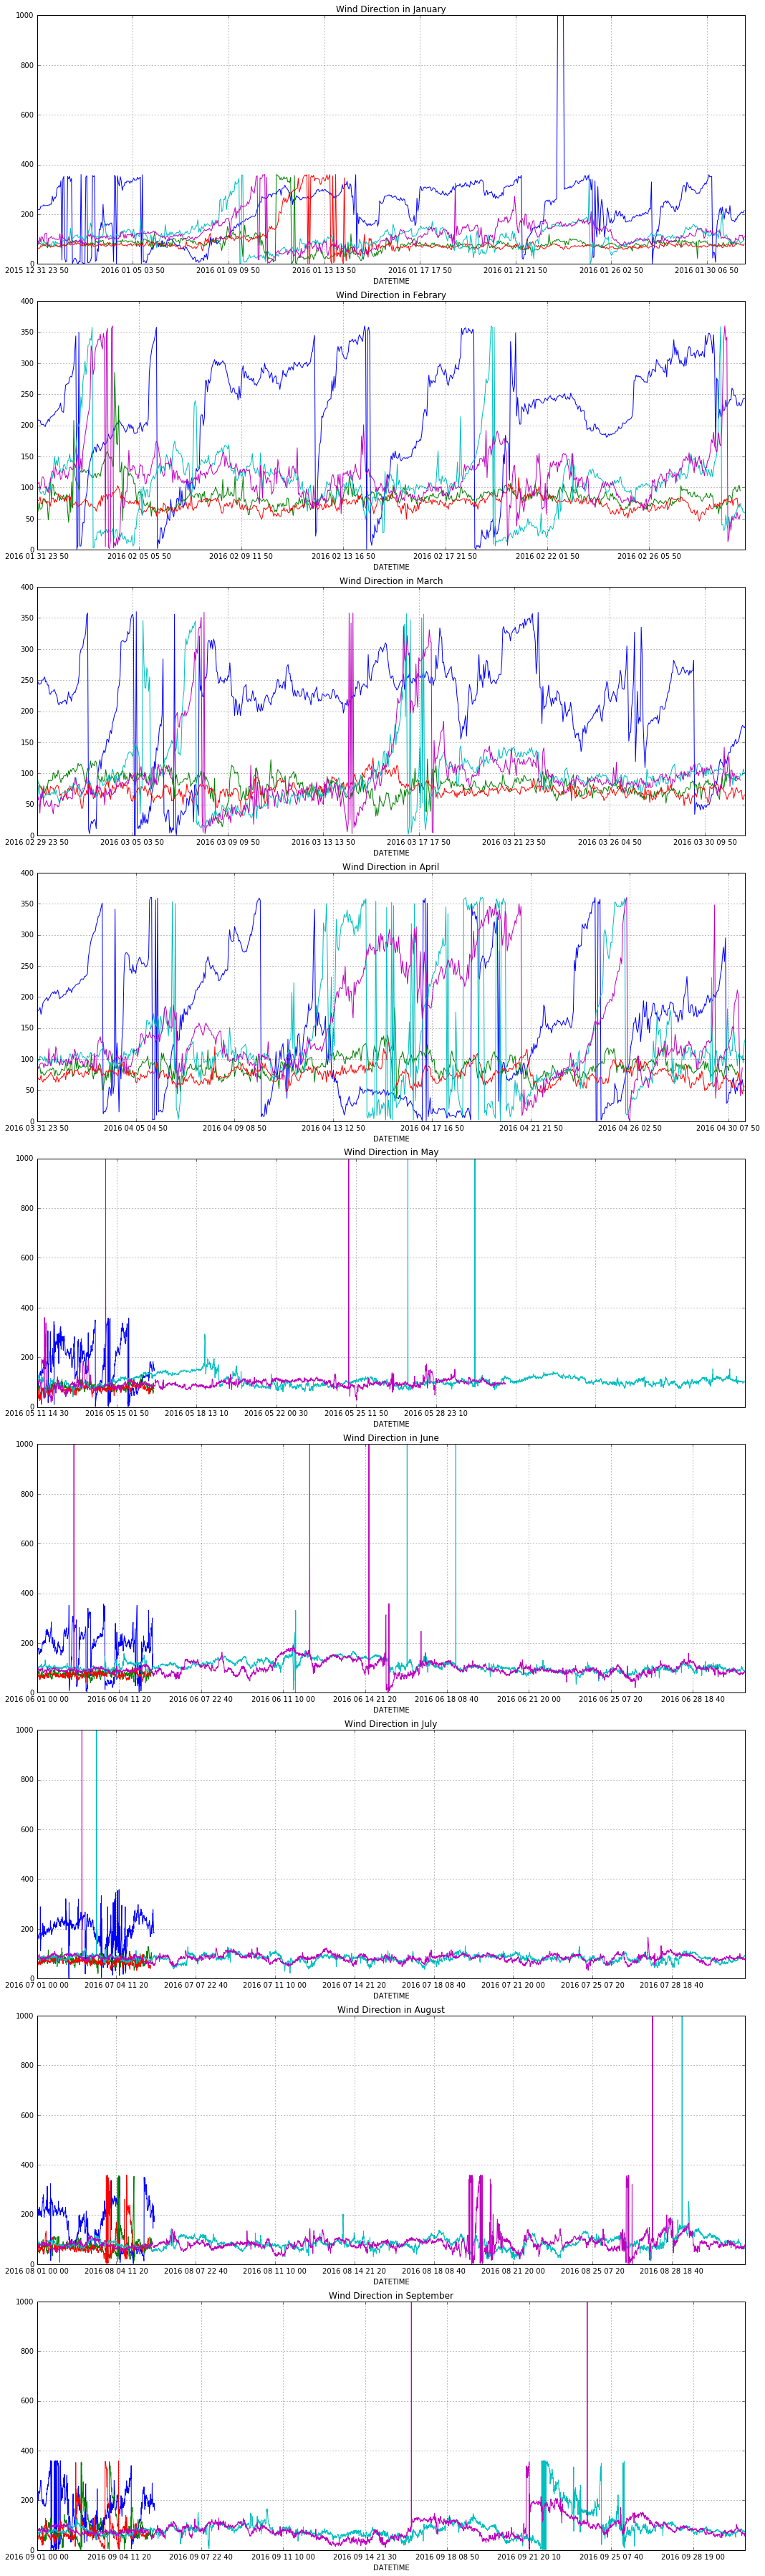

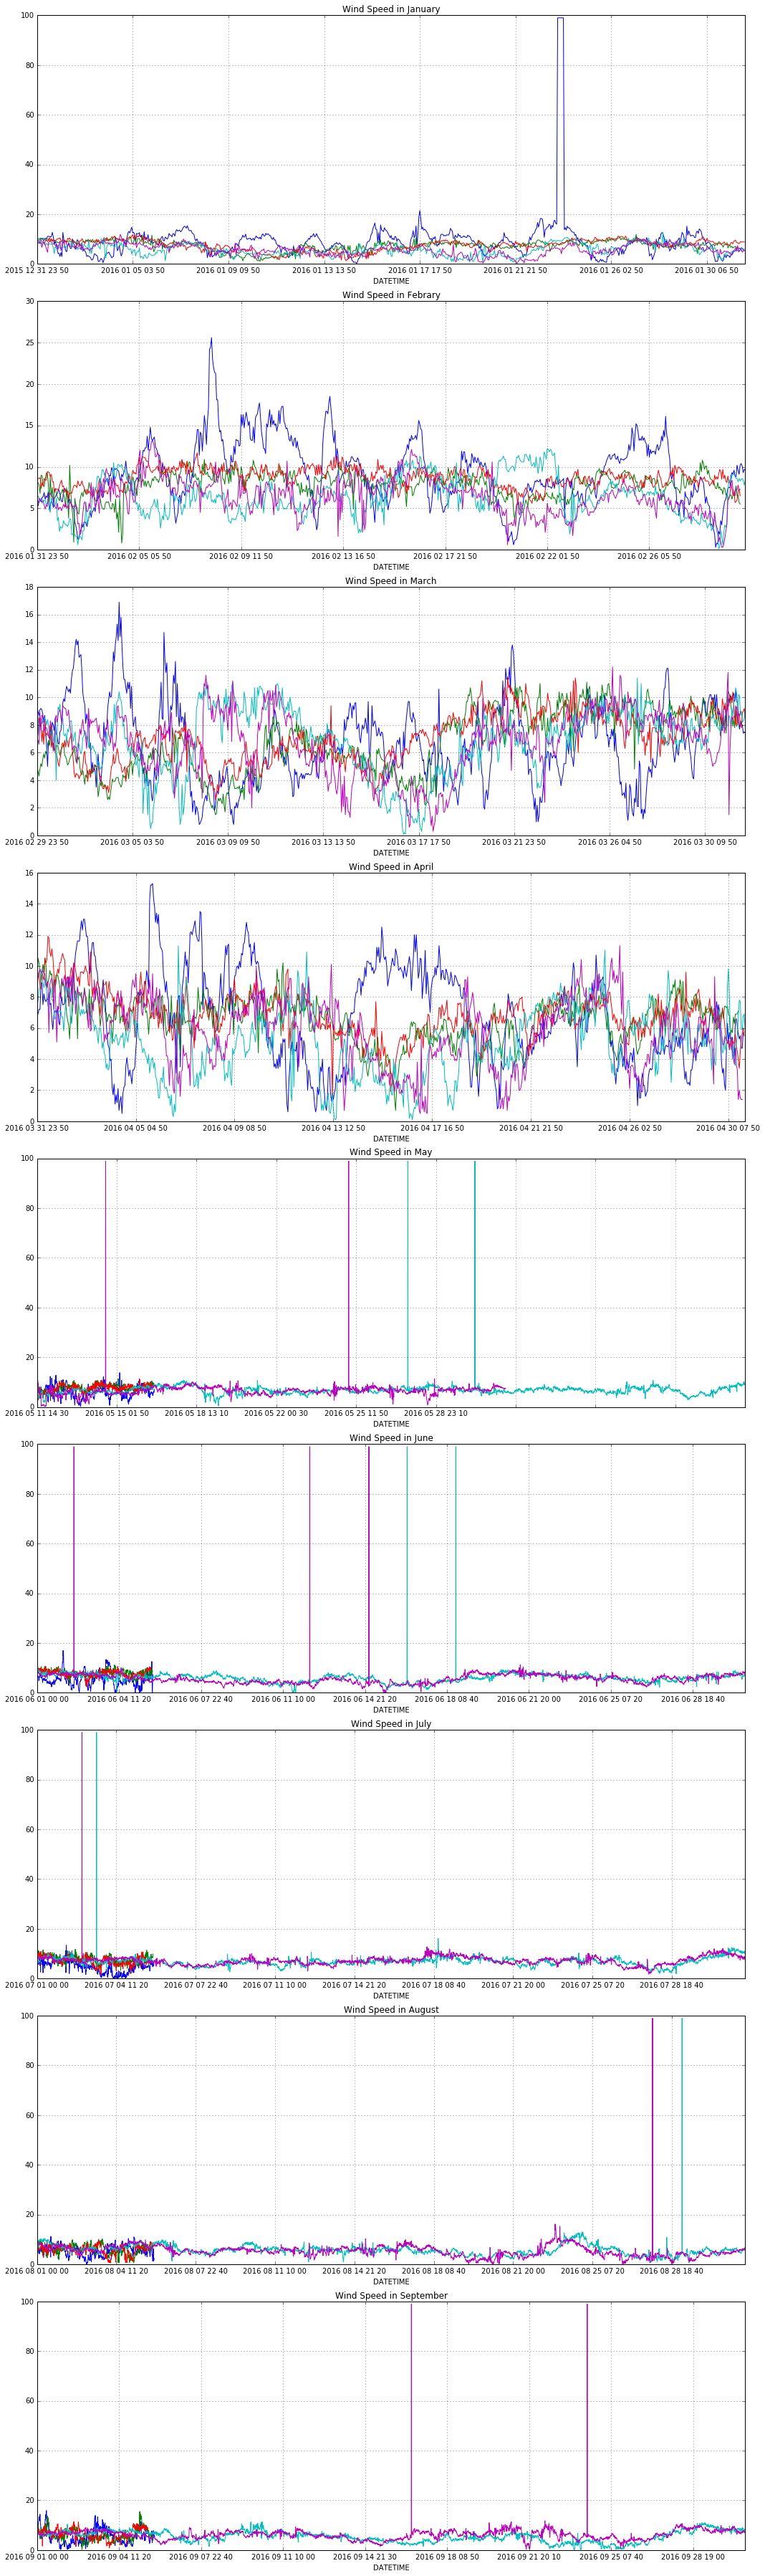

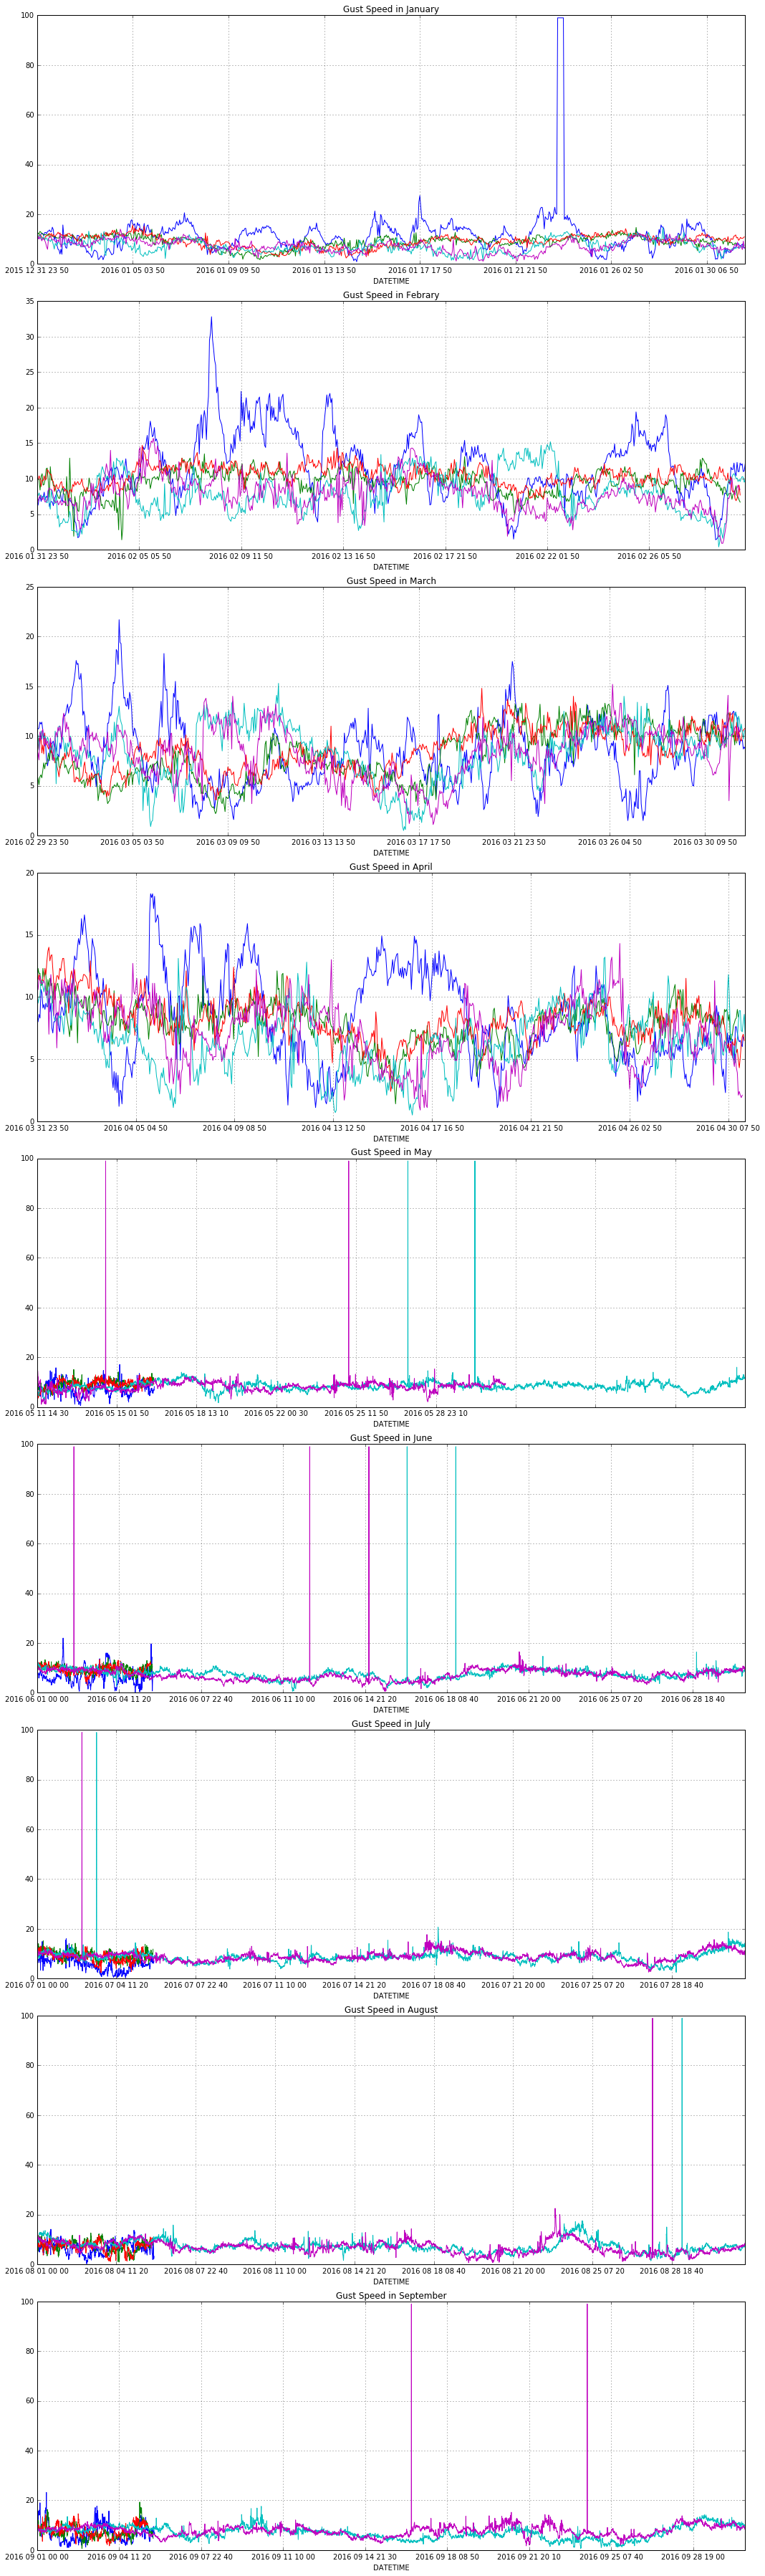

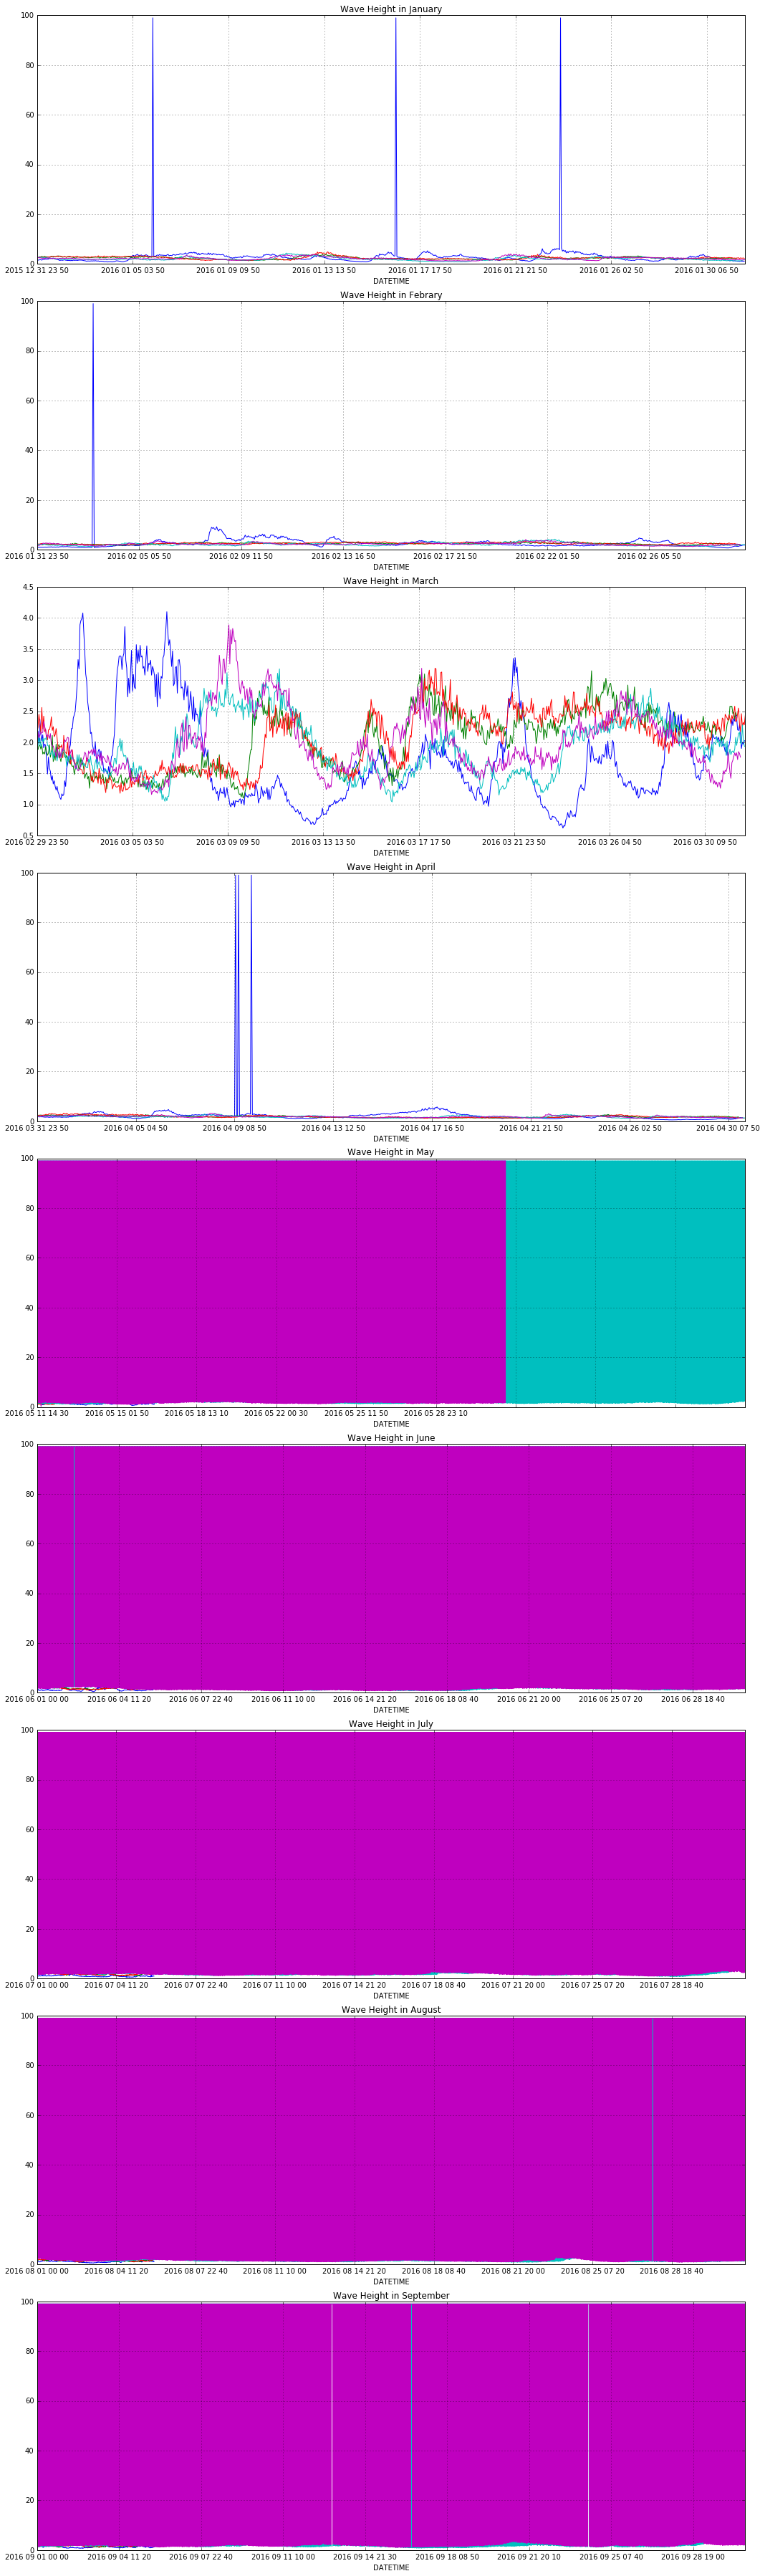

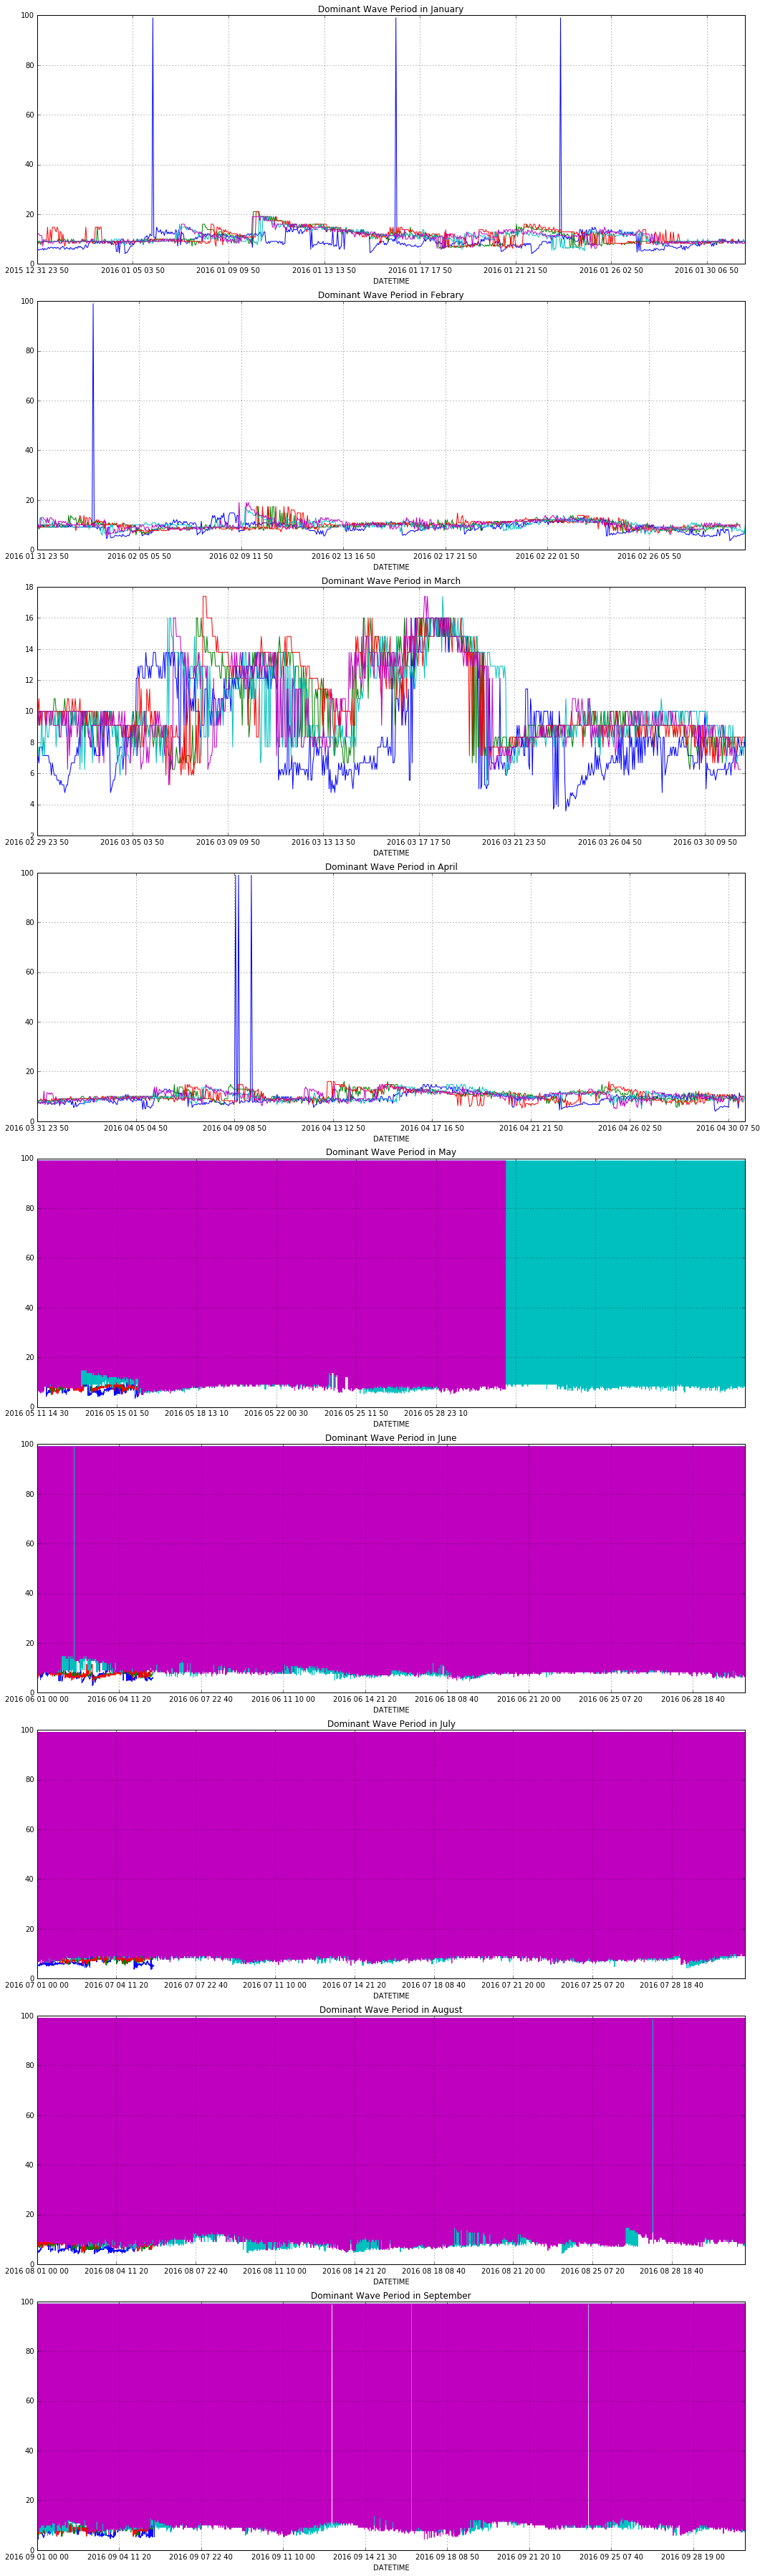

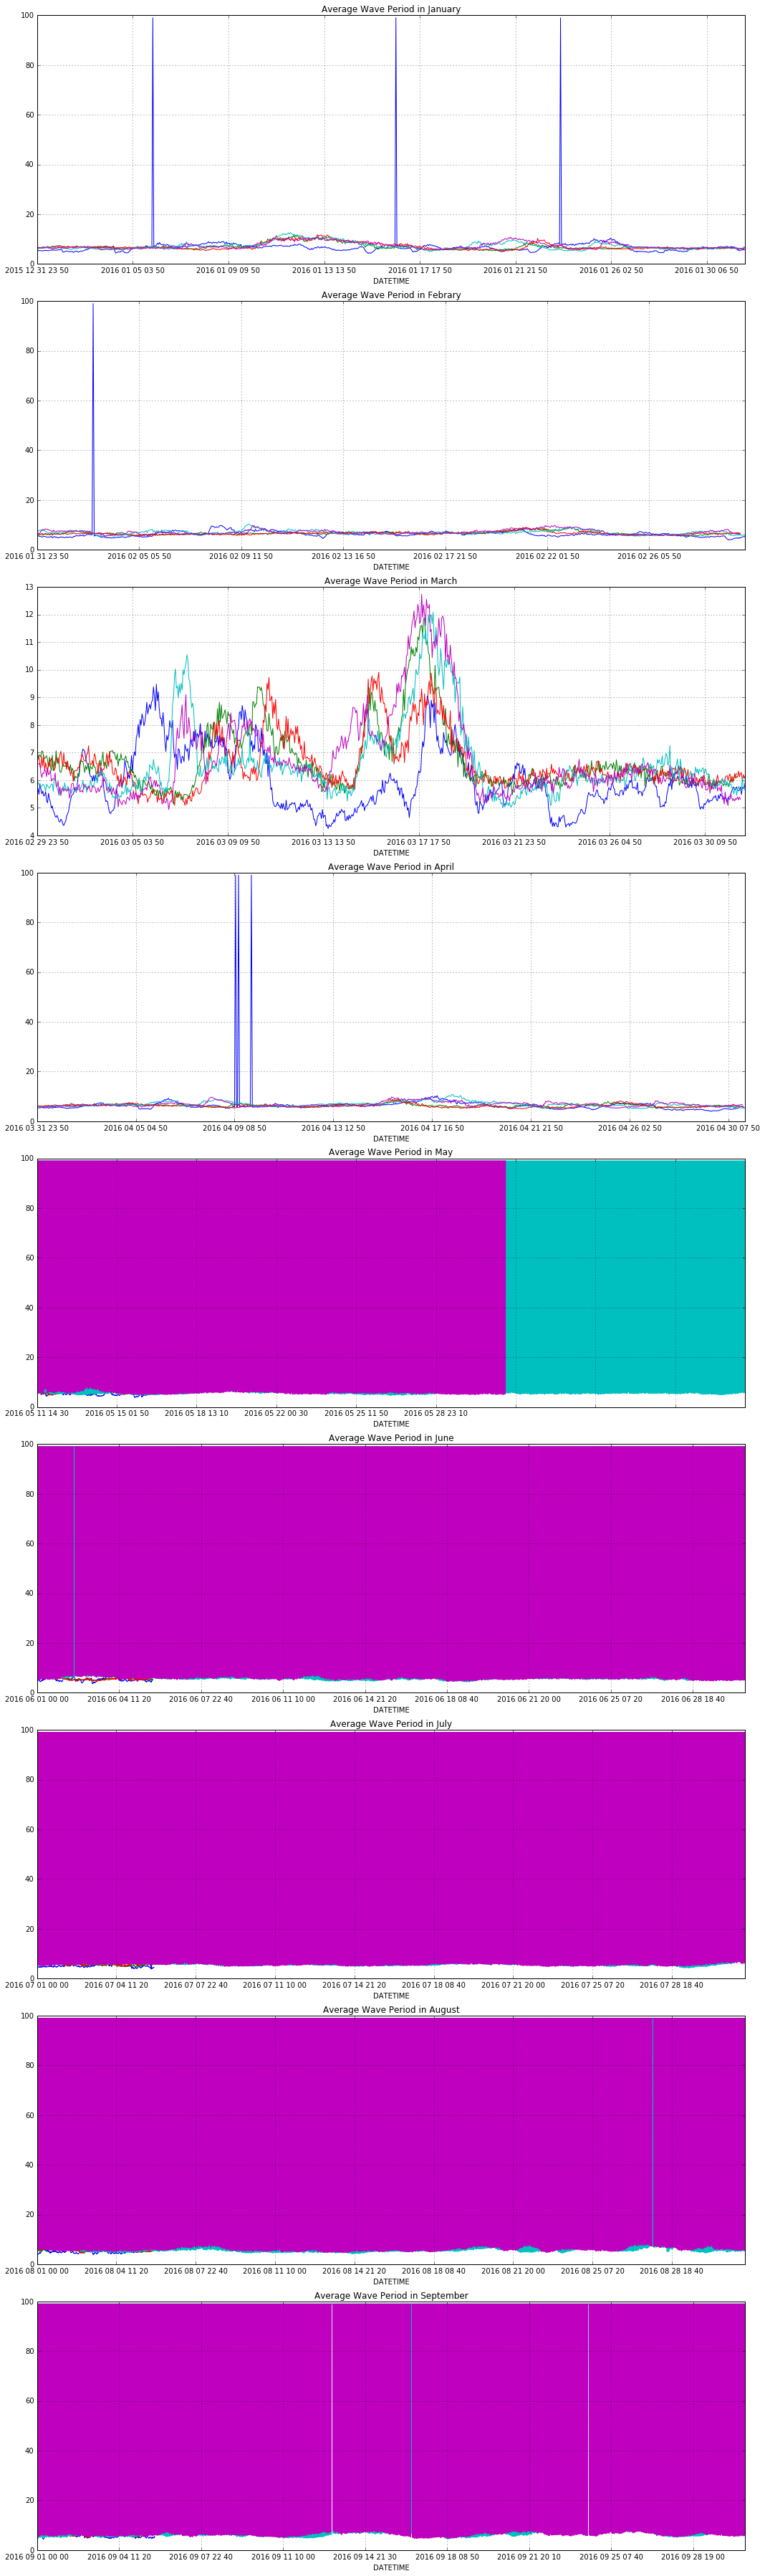

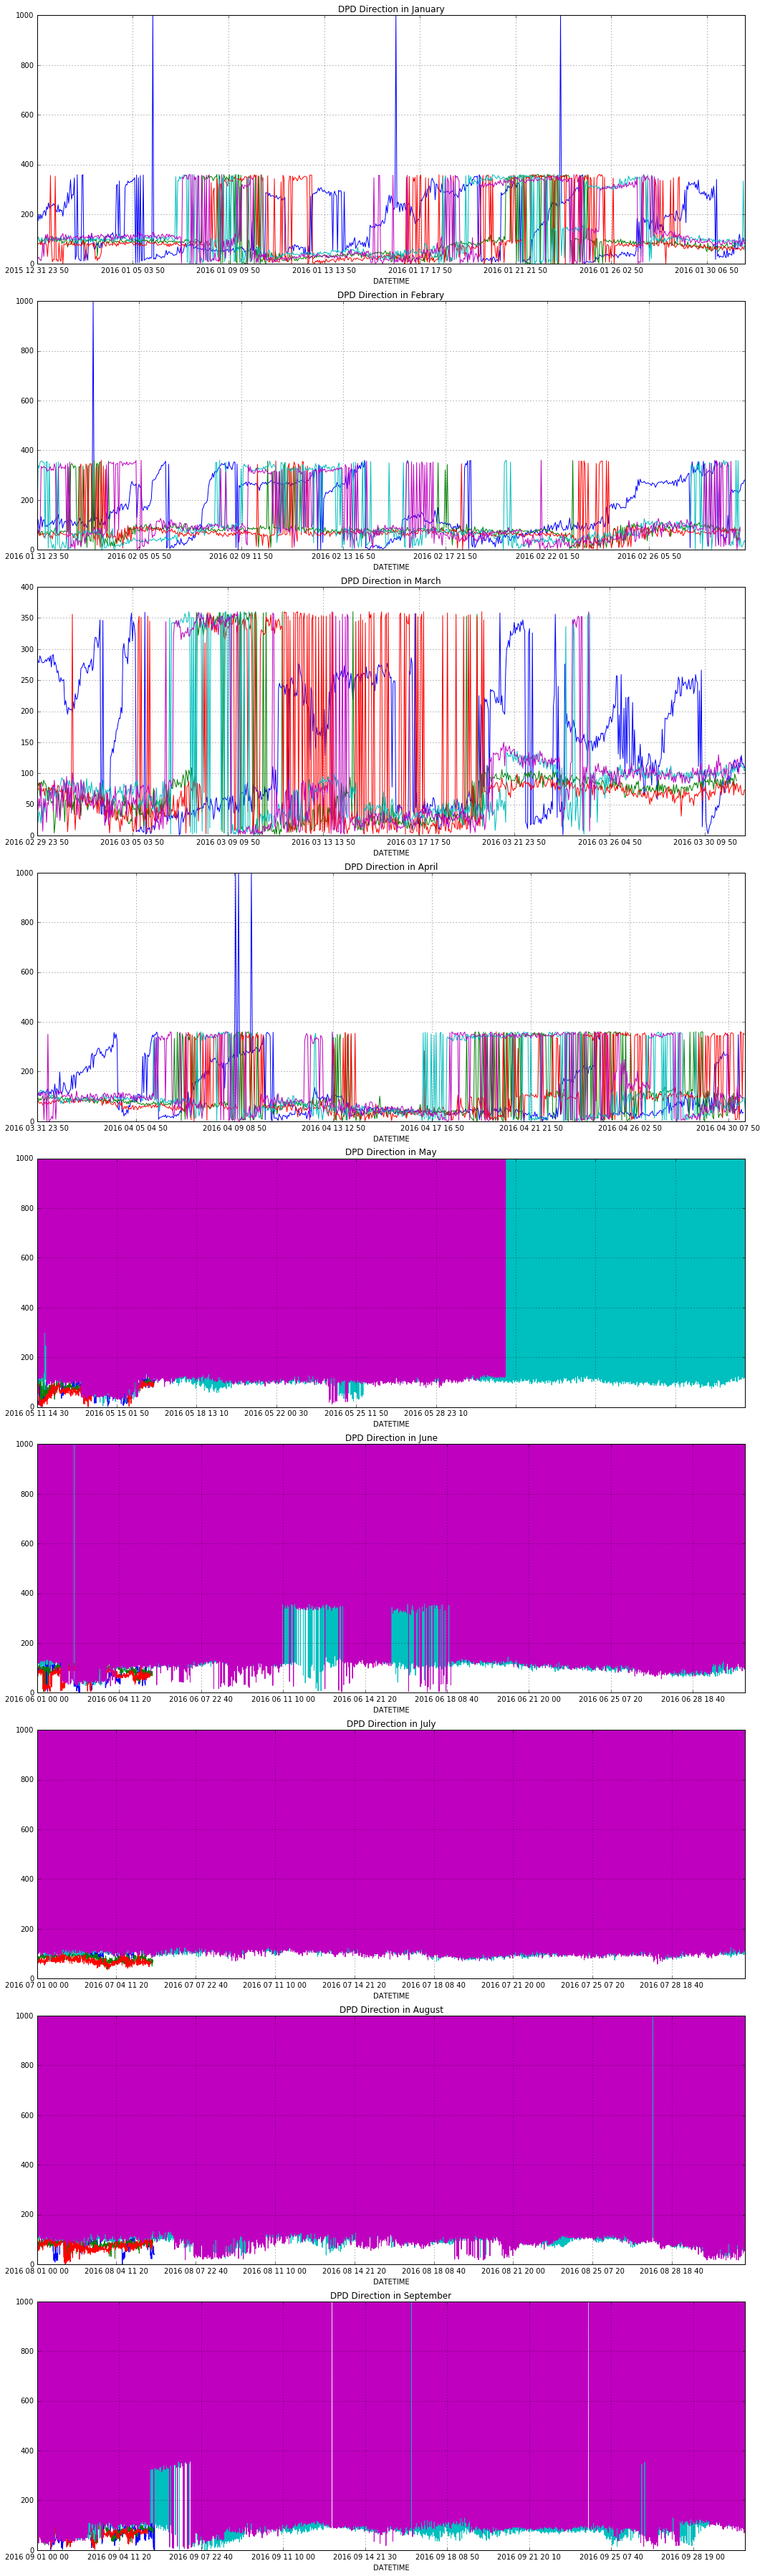

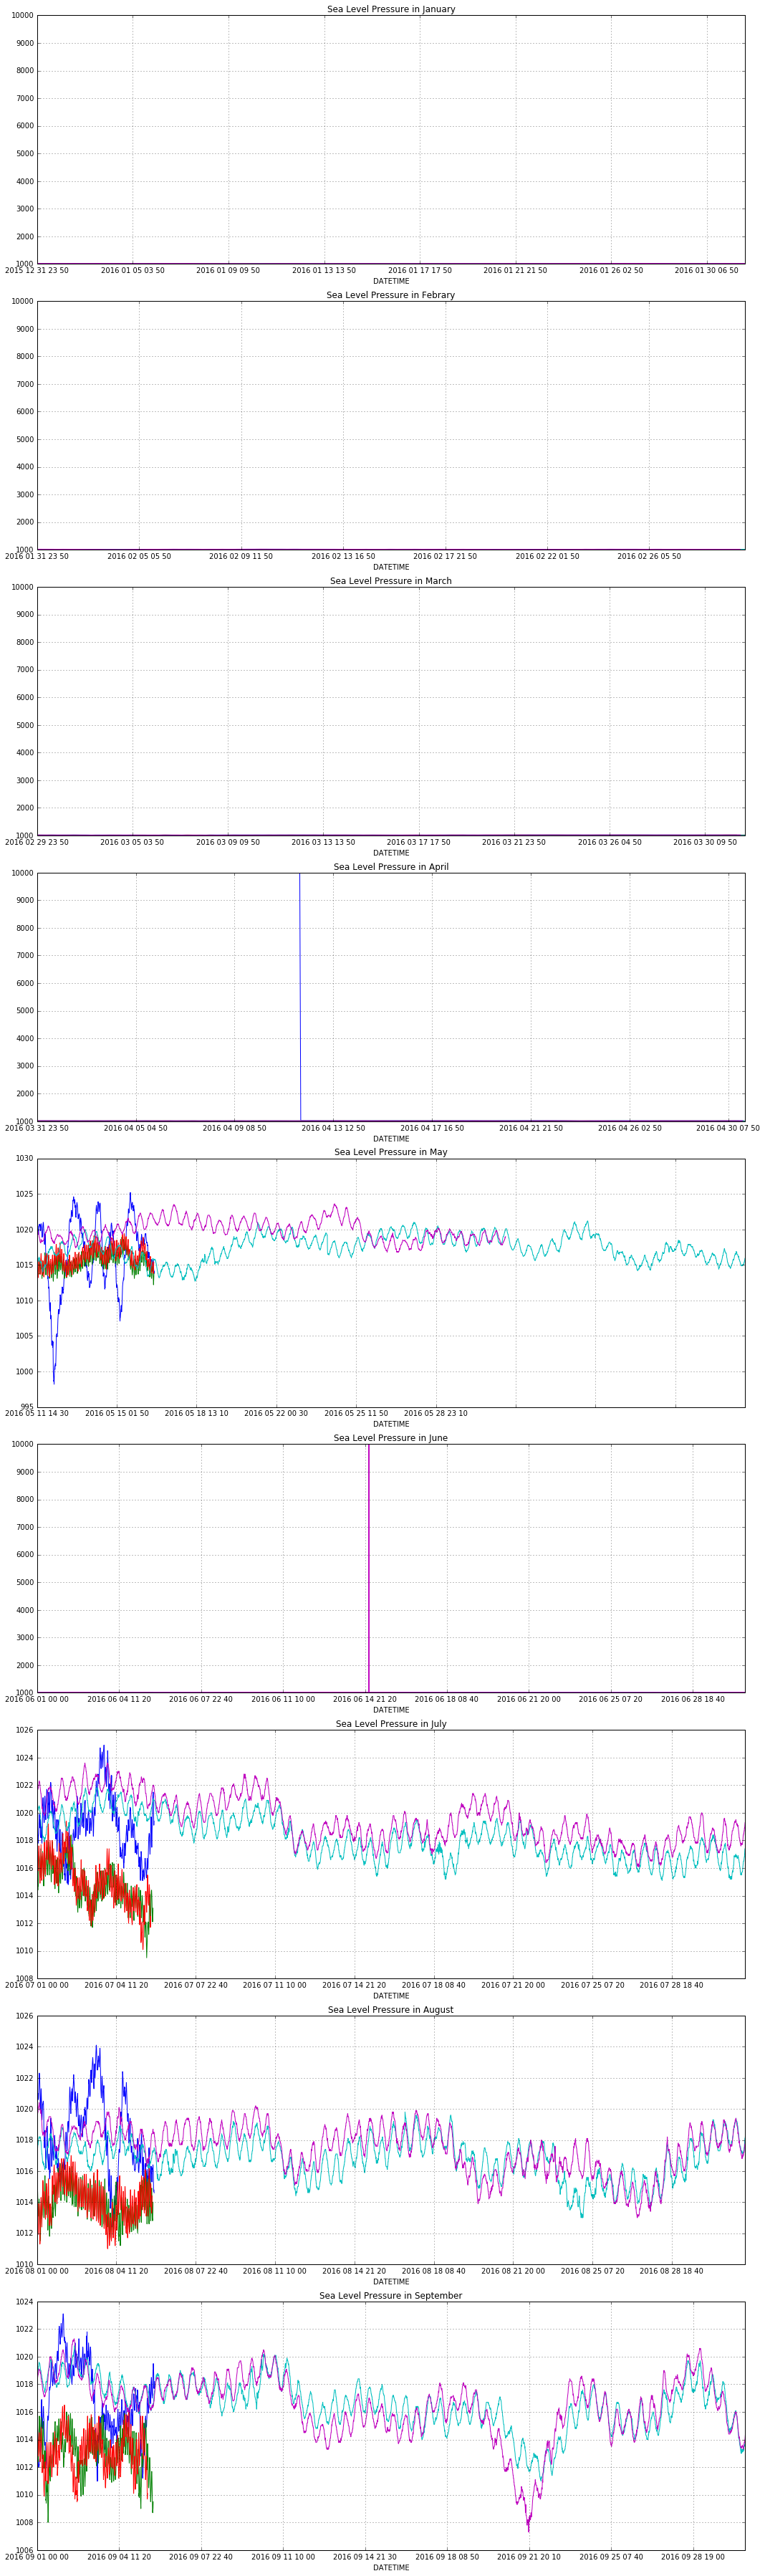

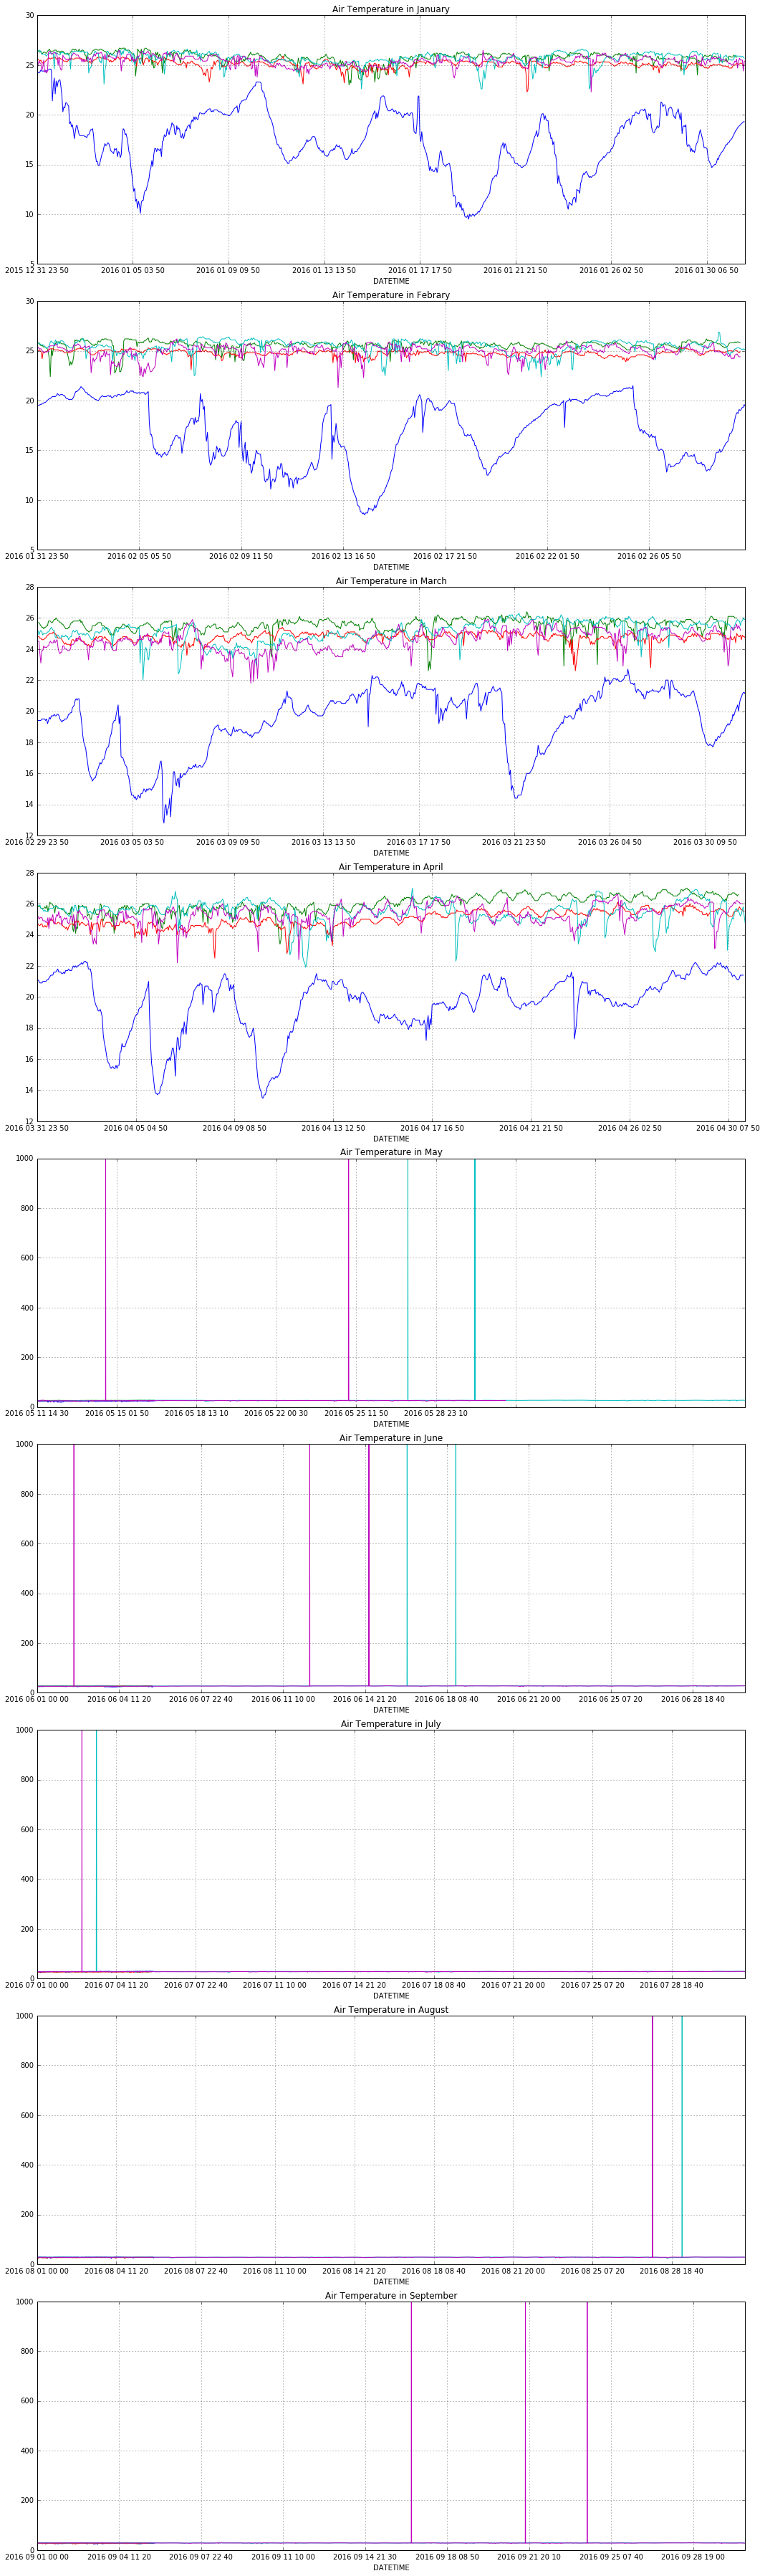

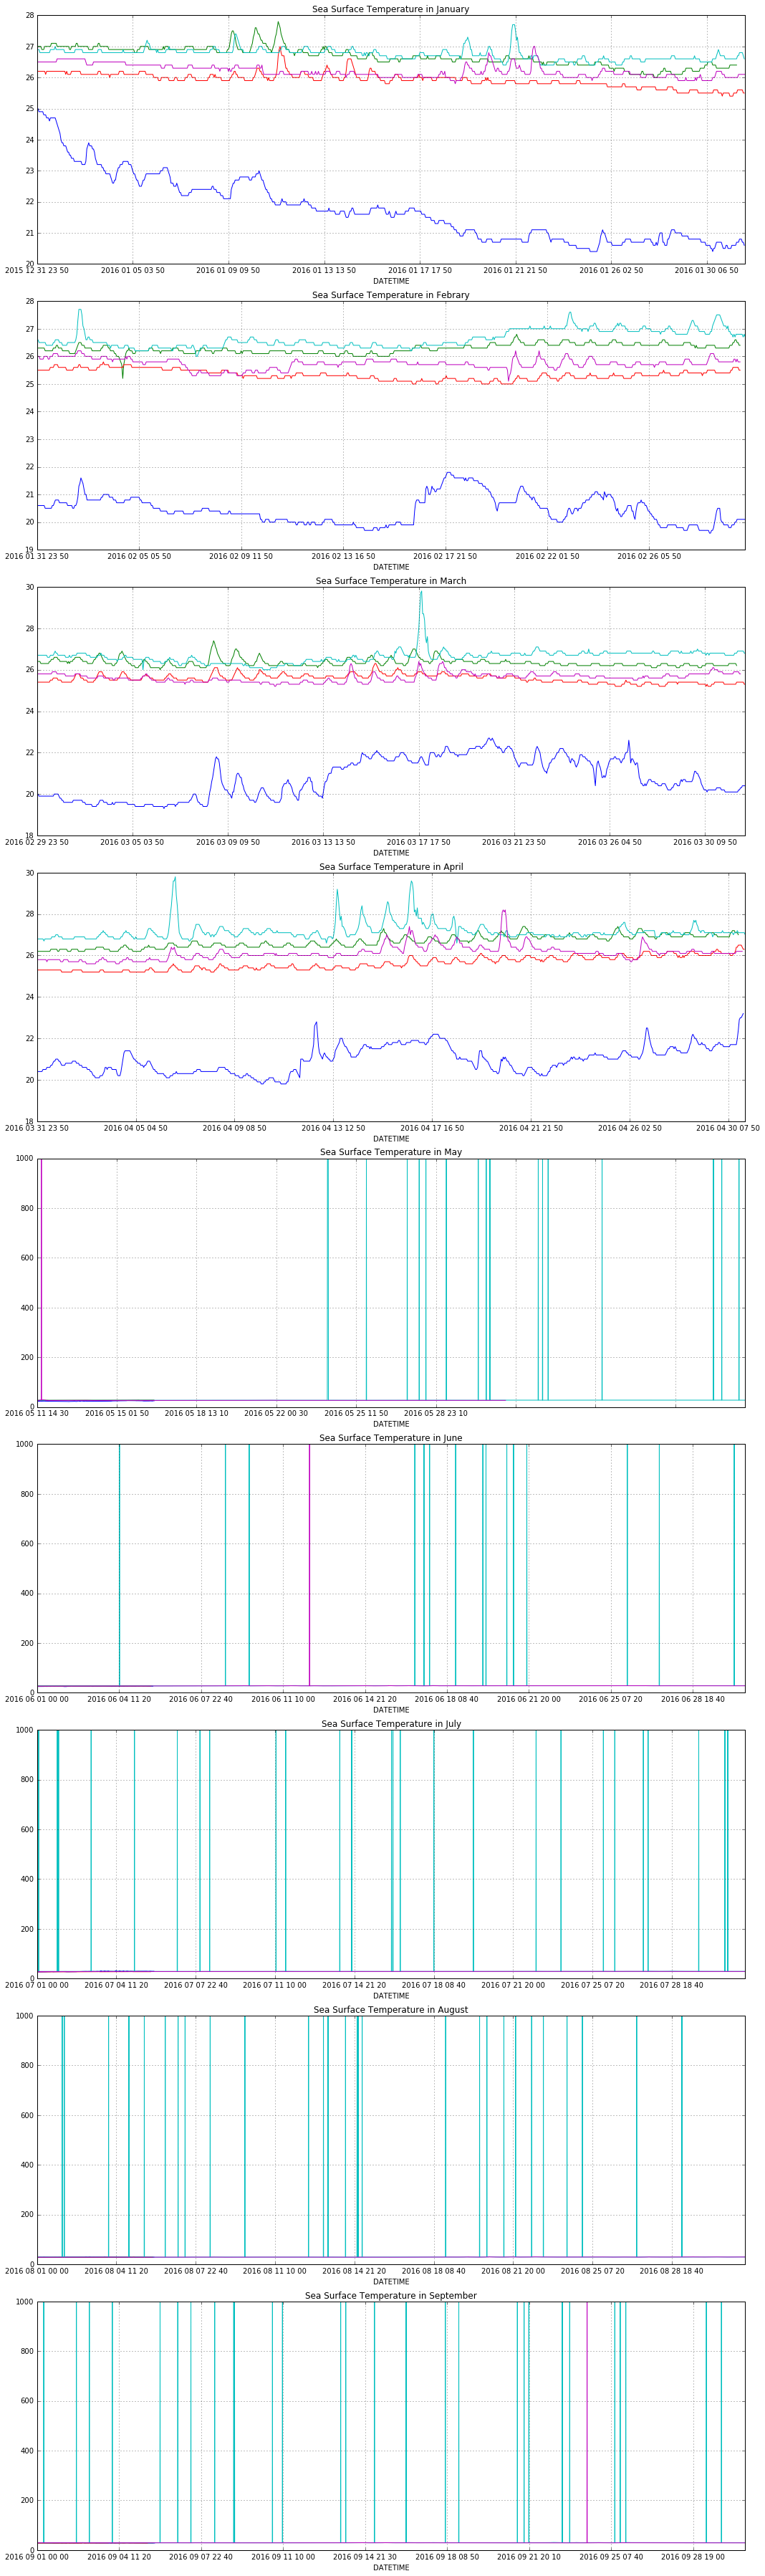

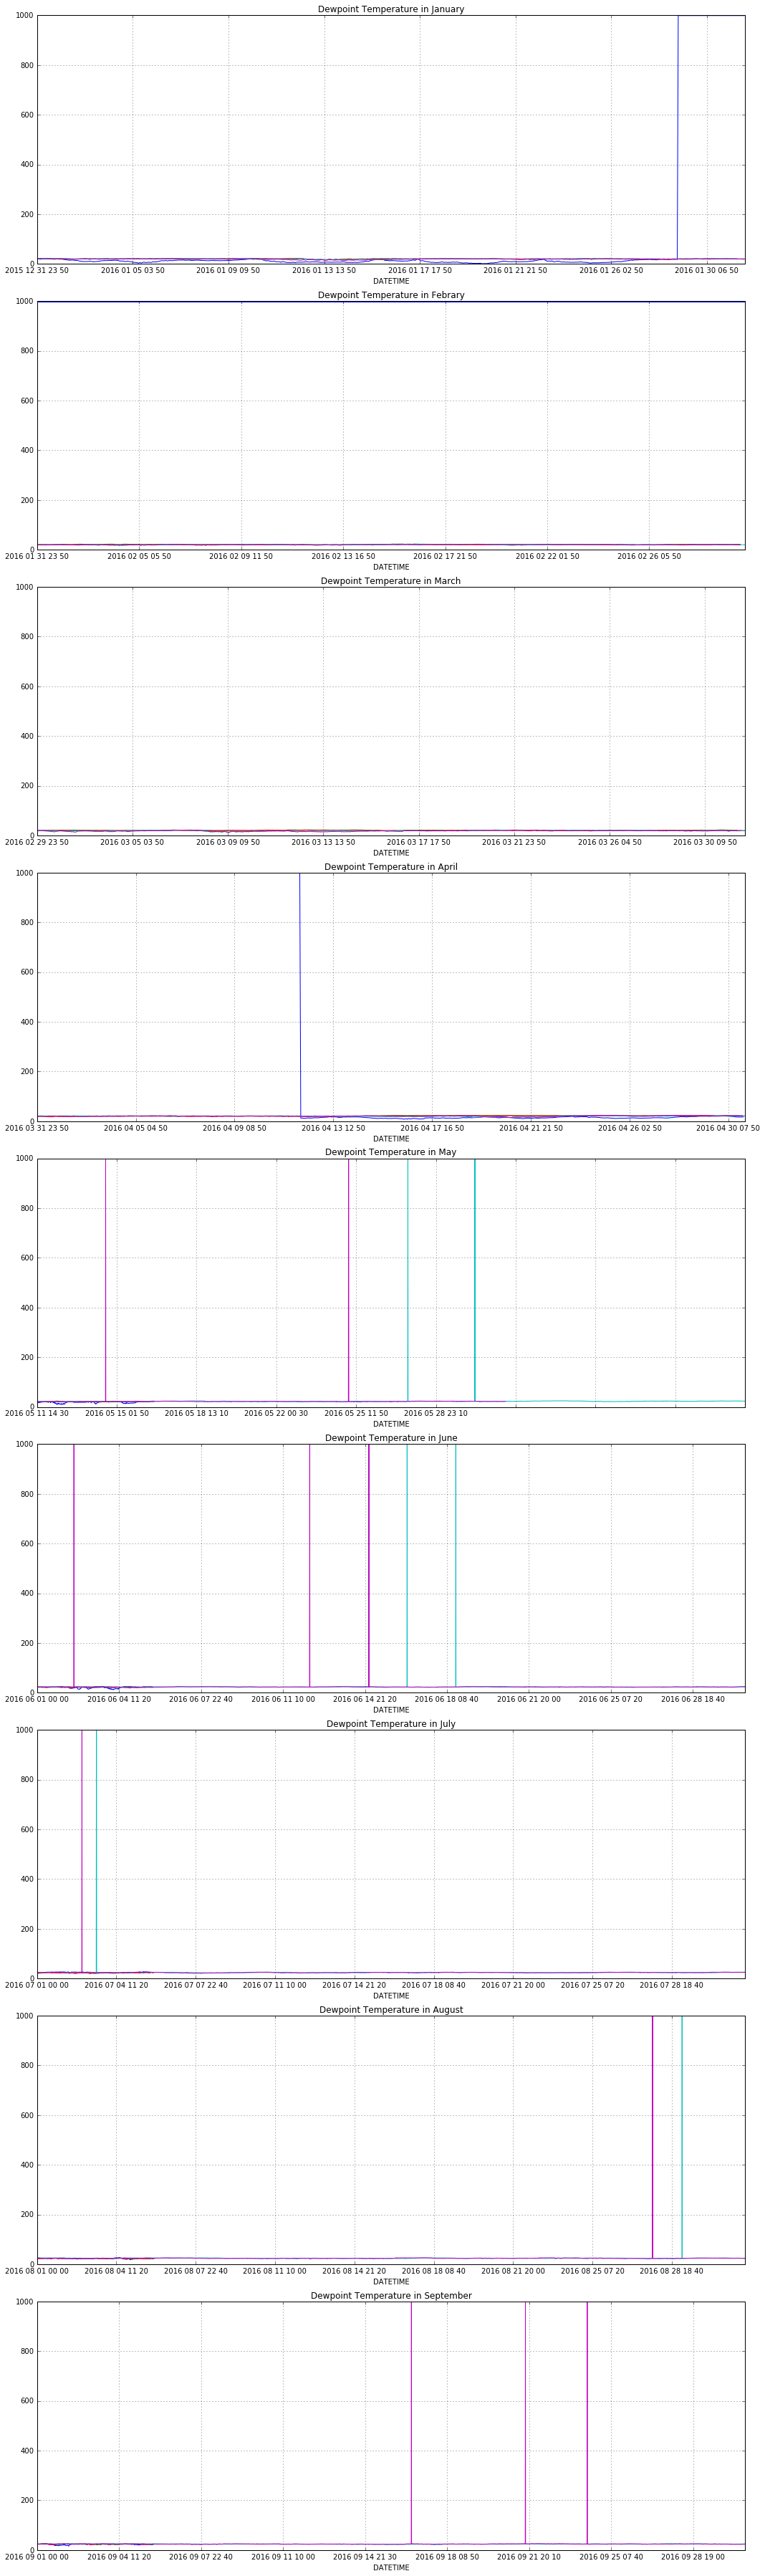

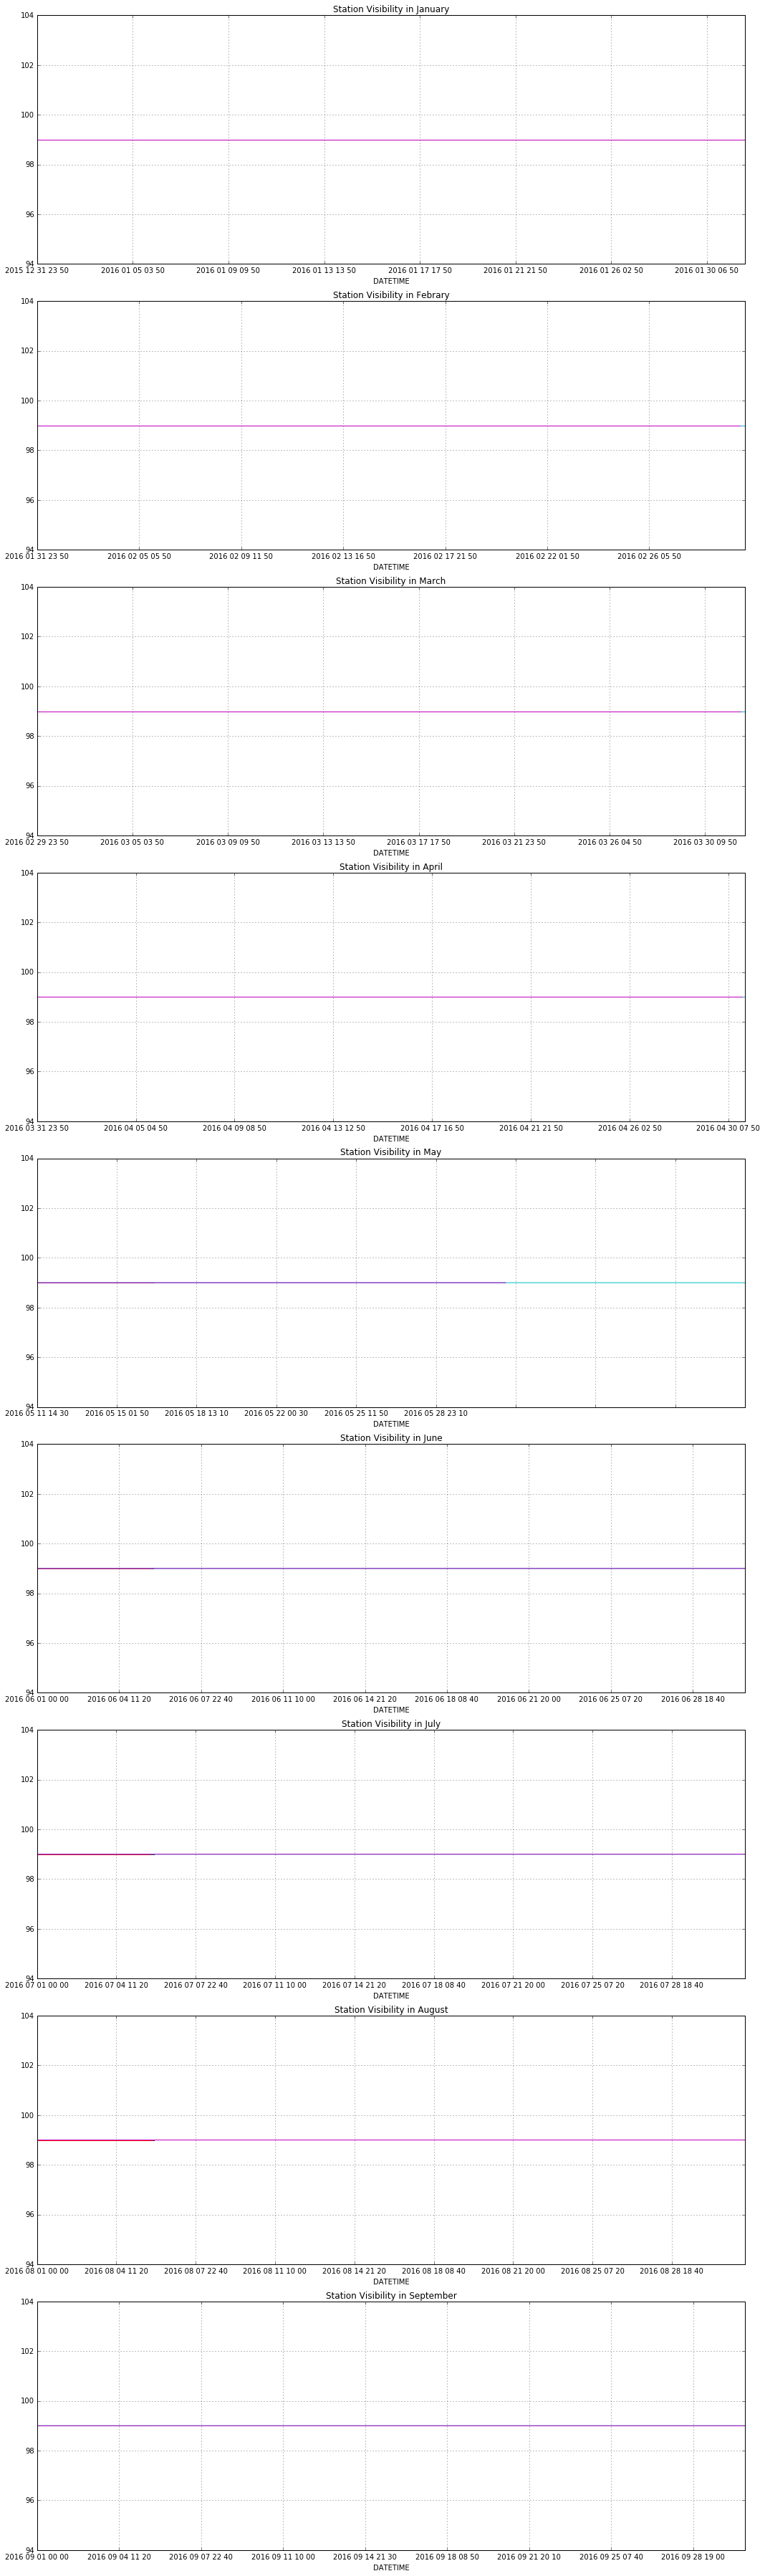

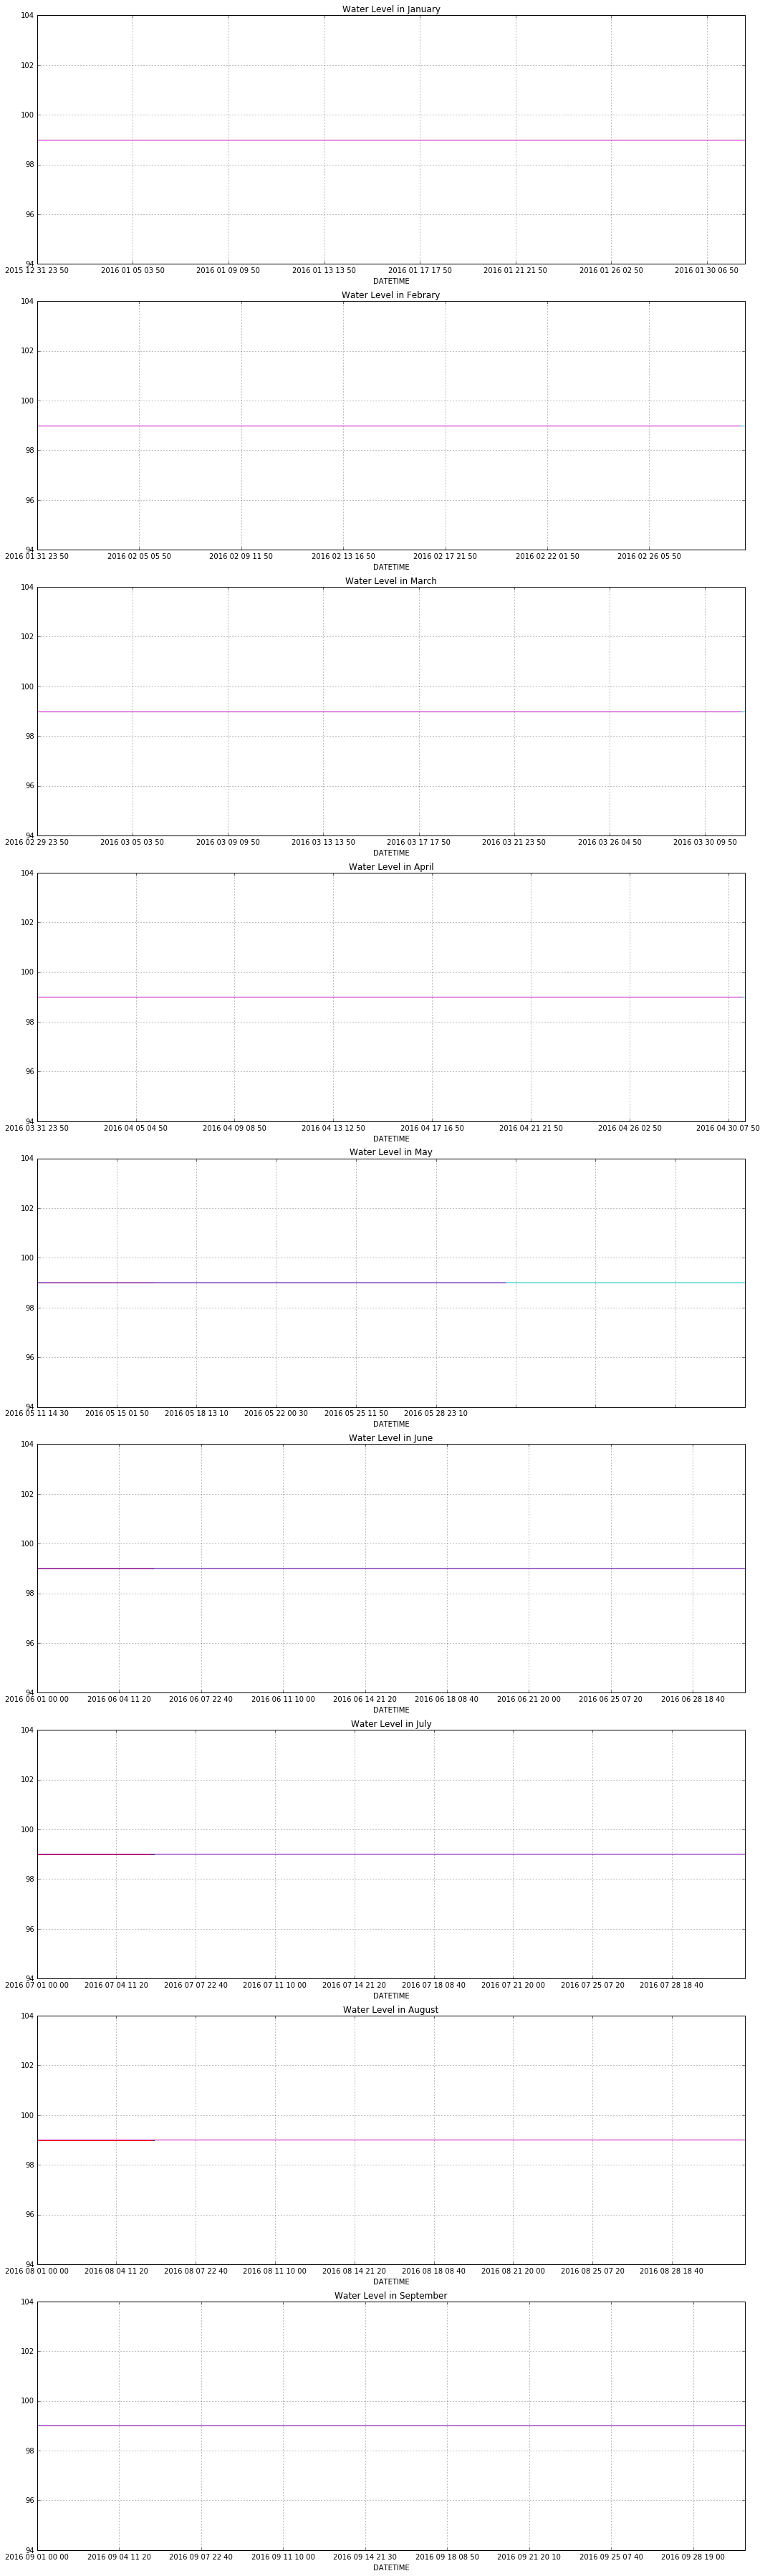

In [155]:
for predictor in bs[buyo_ids[0]][0].columns.values:
    if predictor != 'DATETIME':
        plot_predictor(predictor)

# TODO: not all predictors can be visualized as lines
# need to explore 'kind' parameter of the plot method to create different kinds of graphs

# TODO: some months look weird - need to check the dataset and maybe try different kind of graph
# for instance wave height in May - September

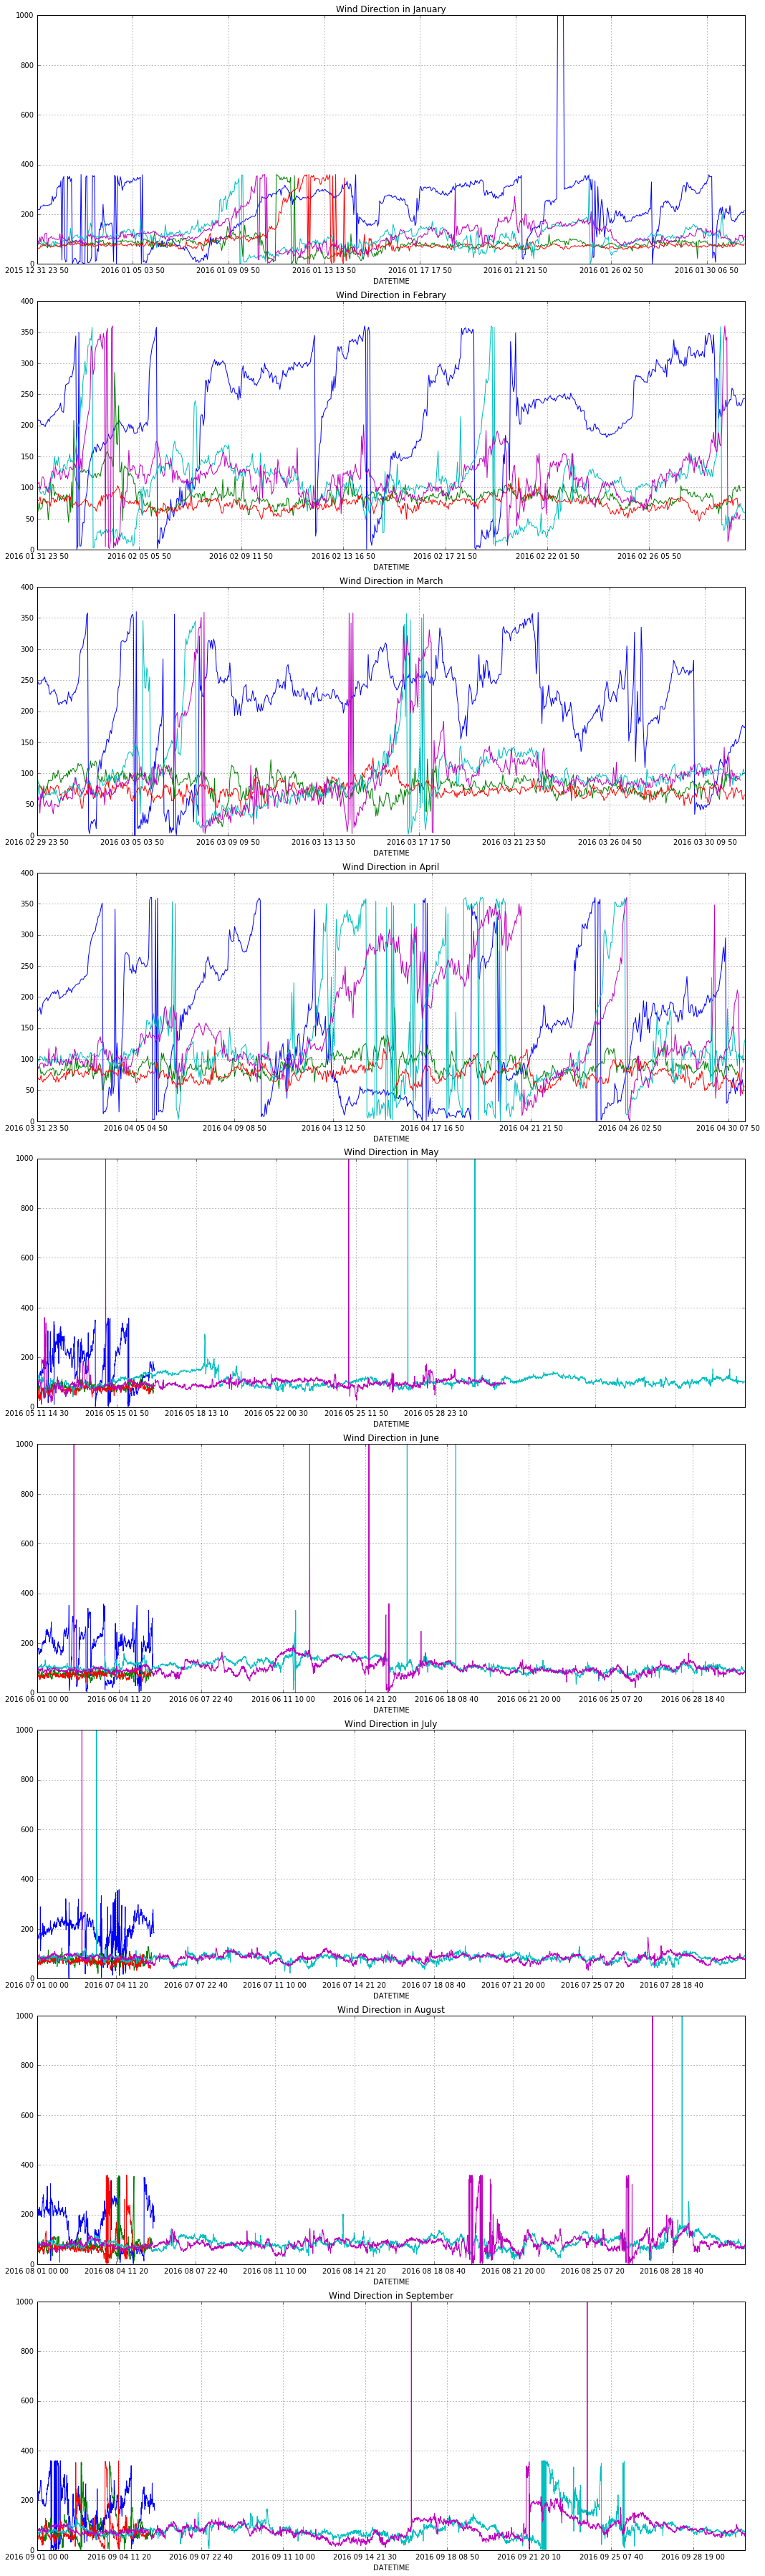

In [146]:
# visualize one predictor over all months and compare between all buyos
# TODO: pandas plot api is very rich, need to explore it more
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

predictor = 'WDIR'

_, axs = plt.subplots(totalMonths, 1, figsize=(15, 50))

for month, ax in enumerate(axs):
    for bid in range(len(buyo_ids)):
        bs[buyo_ids[bid]][month].plot(x = 'DATETIME', 
                                      y = predictor, 
                                      ax = ax,
                                      grid = True,
                                      title = '{} in {}'.format(get_name(predictor), get_month(month)),
                                      legend = None)

plt.tight_layout()
plt.show() 